In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd

## Generate stimulus signal

In [2]:
# Parameters
fs = 3e6//64  # Sampling frequency
f0 = 1e3  # Frequency of the cosine wave
N = 2**14  # Number of samples

# Generate the angular frequency array
w = 2 * np.pi * f0 / fs * np.arange(0, N)

# Generate the stimulus
stim = np.cos(w) + 1

# Subtract the mean 
stim_normalized = stim - np.mean(stim)
# Normalizing the stimulus to be in the range of -1 to 1 for WAV format
stim_normalized = stim / np.max(np.abs(stim))

# Convert the stimulus to 16-bit integers, as required by the WAV format
stim_int16 = np.int16(stim_normalized * np.iinfo(np.int16).max)

# File path for the WAV file
wav_file_path = './stim.wav'

# Writing the WAV file
write(wav_file_path, int(fs), stim_int16)

# Displaying the path to the WAV file
wav_file_path

'./stim.wav'

In [3]:
ipd.Audio(wav_file_path)

## Compare the original stimulus and similuated stimulus

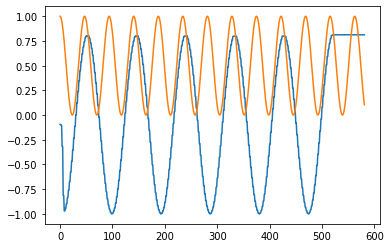

In [29]:
with open('../output_mic_data.log', 'r') as fd:
    content = fd.read()

pdm_data = []

for x in content.split(','):
    pdm_data.append(int(x))
pdm_data = np.array(pdm_data)

pdm_data = pdm_data - np.mean(pdm_data)
pdm_data = pdm_data / np.max(np.abs(pdm_data))

plt.plot(pdm_data)
plt.plot(stim_normalized[:len(pdm_data)])


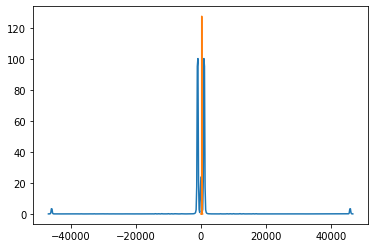

In [30]:
N = 512
fs = 3e6/64

window = np.hanning(N)

fft_data = np.fft.fftshift(np.abs(np.fft.fft(pdm_data[0:N]*window)))
x_data = np.arange(-N/2, N/2)*fs*2/N
plt.plot(x_data, fft_data)

fft_stim_data = np.fft.fftshift(np.abs(np.fft.fft(stim_normalized[0:N]*window)))
plt.plot(fft_stim_data)

plt.show()

## PDM to PCM (FPGA)

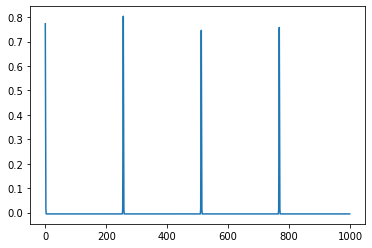

In [15]:
with open("../test_blank.bin", "rb") as f:
    mic_data = np.fromfile(f, ">i4")

mic_data = mic_data - np.mean(mic_data)
mic_data = mic_data / np.max(np.abs(mic_data))
plt.plot(mic_data[:1000])

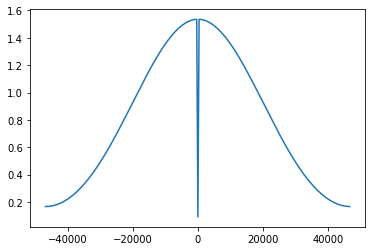

In [16]:
N = 512
fs = 3e6/64

window = np.hanning(N)

fft_data = np.fft.fftshift(np.abs(np.fft.fft(mic_data[0:N]*window)))
x_data = np.arange(-N/2, N/2)*fs*2/N
plt.plot(x_data, fft_data)

plt.show()

In [17]:
retrieved = np.abs(np.fft.ifft(mic_data))

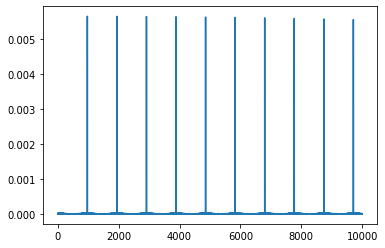

In [22]:
plt.plot(retrieved[:10000])

In [19]:
ipd.Audio(retrieved,rate=3e6//64)

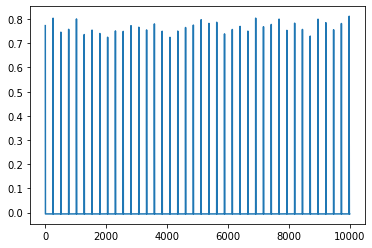

In [97]:
with open("../test_blank.bin", "rb") as f:
    mic_data_raw = np.fromfile(f, ">i4")
mic_data_raw = mic_data_raw - np.mean(mic_data_raw)
mic_data_raw = mic_data_raw / np.max(np.abs(mic_data_raw))
plt.plot(mic_data_raw[:10000])

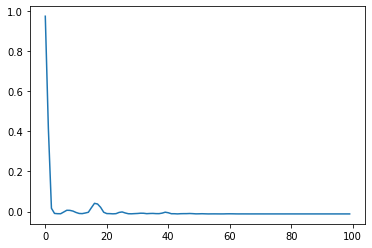

In [98]:
with open("../music.bin", "rb") as f:
    mic_data = np.fromfile(f, ">i4")

mic_data = mic_data - np.mean(mic_data)
mic_data = mic_data / np.max(np.abs(mic_data))
plt.plot(mic_data[:100])

In [99]:
mic_data = mic_data[:248576] - mic_data_raw[:248576]

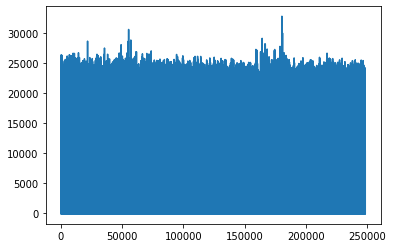

In [100]:
# Subtract the mean 
mic_data_normalized = mic_data_raw - np.mean(mic_data)
# Normalizing the stimulus to be in the range of -1 to 1 for WAV format
mic_data_normalized = mic_data_normalized / np.max(np.abs(mic_data_normalized))

# Convert the stimulus to 16-bit integers, as required by the WAV format
mic_data_normalized_int16 = np.int16(mic_data_normalized * np.iinfo(np.int16).max)

plt.plot(mic_data_normalized_int16)

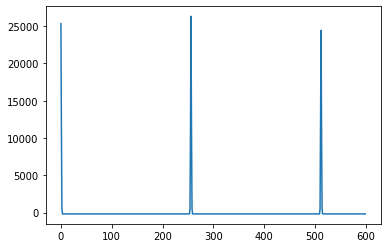

In [101]:
plt.plot(mic_data_normalized_int16[:600])

In [102]:
# File path for the WAV file
wav_file_path = './mic_audio.wav'

# Writing the WAV file
write(wav_file_path, int(fs), mic_data_normalized_int16)

# Displaying the path to the WAV file
wav_file_path

'./mic_audio.wav'

In [103]:
ipd.Audio(wav_file_path)

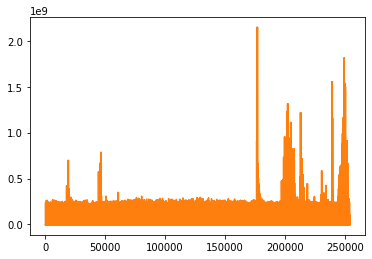

In [63]:
sample_bytes = 4
mic_data_normalized_2 = mic_data_normalized*(2**((sample_bytes*8)-1))-1
plt.plot(mic_data_normalized)
plt.plot(mic_data_normalized_2)